## mask_classification
### colab에서 실행할 것

In [ ]:
pwd


'/content'

In [ ]:
!unzip -qq "/content/drive/MyDrive/archive (2).zip"

In [ ]:
import pandas as pd
import numpy as np
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import seaborn as sns


폴더 별로 데이터를 정리하기 위한 코드

In [ ]:
path = '/content/Face Mask Dataset/'
dataset = {
    "image_path" : [],
    "mask_status" : [],
    "where" : []
}

for where in os.listdir(path):
    for status in os.listdir(path+"/"+where):
        for image in glob.glob(path+where+"/" + status + "/" + "*.png"):
            dataset["image_path"].append(image)
            dataset["mask_status"].append(status)
            dataset["where"].append(where)

dataset = pd.DataFrame(dataset)
dataset.head()

,image_path,mask_status,where
0,/content/Face Mask Dataset/Validation/WithMask...,WithMask,Validation
1,/content/Face Mask Dataset/Validation/WithMask...,WithMask,Validation
2,/content/Face Mask Dataset/Validation/WithMask...,WithMask,Validation
3,/content/Face Mask Dataset/Validation/WithMask...,WithMask,Validation
4,/content/Face Mask Dataset/Validation/WithMask...,WithMask,Validation


In [7]:
# 전체 데이터 분포

with Mask :  5909
without mask :  5883


<Axes: xlabel='mask_status', ylabel='count'>

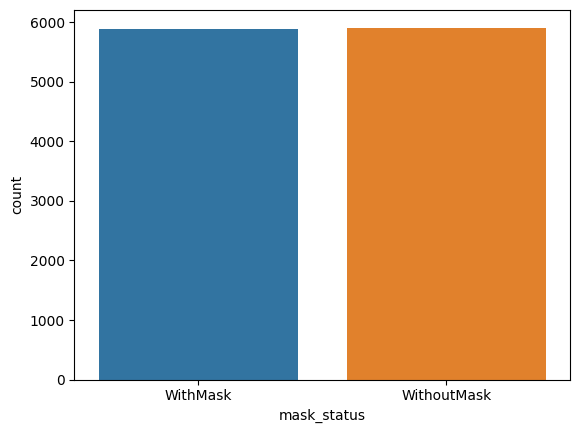

In [8]:
print(f"with Mask : ", dataset.value_counts("mask_status")[0])
print(f"without mask : ", dataset.value_counts("mask_status")[1])

sns.countplot(x = dataset["mask_status"])

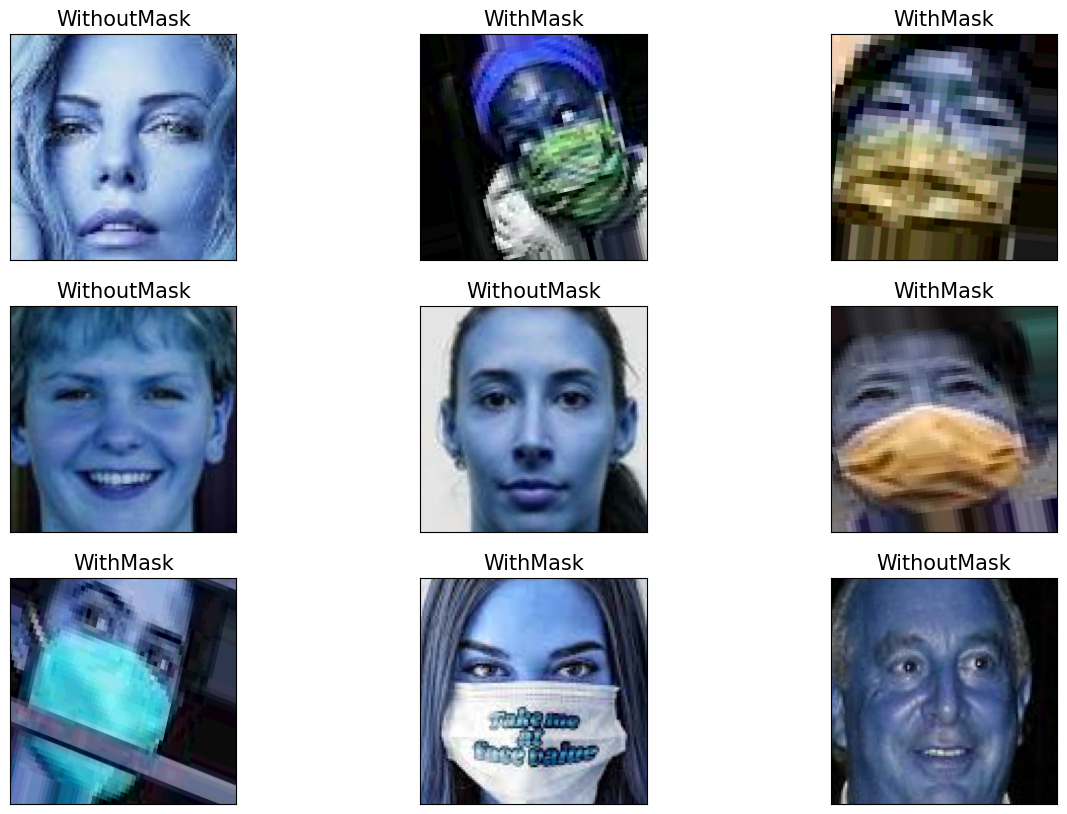

In [9]:
import cv2

plt.figure(figsize = (15, 10))

for i in range(9):
    random = np.random.randint(1, len(dataset))
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.imread(dataset.loc[random, "image_path"]))
    plt.title(dataset.loc[random, "mask_status"], size = 15)
    plt.xticks([])
    plt.yticks([])

plt.show()

In [10]:
train_df  = dataset[dataset["where"] == "Train"]
test_df = dataset[dataset["where"] == "Test"]
valid_df = dataset[dataset["where"] == "Validation"]

print(train_df.head(10))


                                            image_path mask_status  where
800  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
801  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
802  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
803  /content/Face Mask Dataset/Train/WithMask/823.png    WithMask  Train
804  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
805  /content/Face Mask Dataset/Train/WithMask/759.png    WithMask  Train
806  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
807  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
808  /content/Face Mask Dataset/Train/WithMask/Augm...    WithMask  Train
809  /content/Face Mask Dataset/Train/WithMask/229.png    WithMask  Train


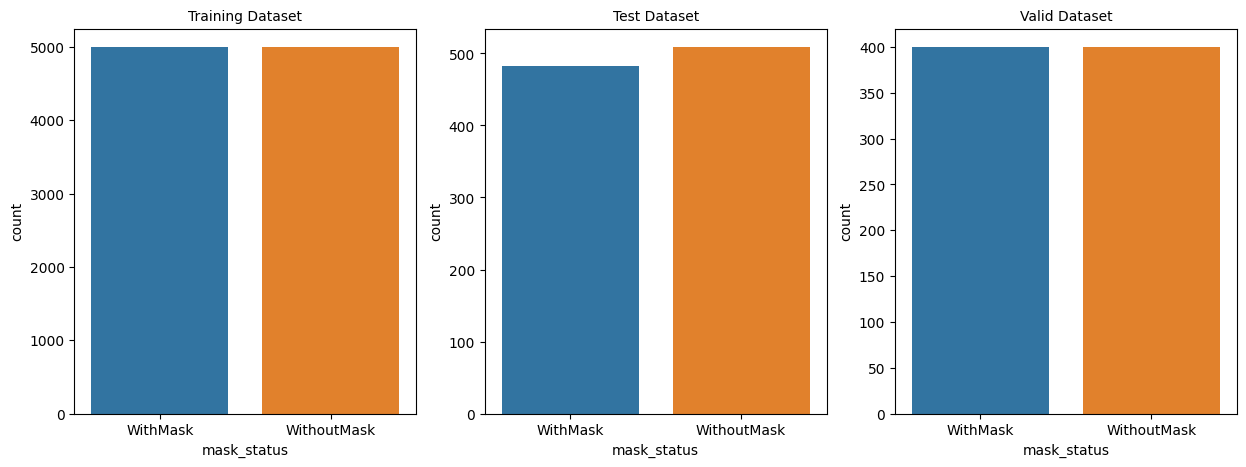

In [11]:
plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.countplot(x = train_df["mask_status"])
plt.title("Training Dataset", size = 10)

plt.subplot(1,3,2)
sns.countplot(x = test_df["mask_status"])
plt.title("Test Dataset", size = 10)

plt.subplot(1,3,3)
sns.countplot(x = valid_df["mask_status"])
plt.title("Valid Dataset", size = 10)

plt.show()

In [12]:
## 인덱스 정리

In [13]:
train_df = train_df.reset_index().drop("index", axis=1)
train_df.head()

,image_path,mask_status,where
0,/content/Face Mask Dataset/Train/WithMask/Augm...,WithMask,Train
1,/content/Face Mask Dataset/Train/WithMask/Augm...,WithMask,Train
2,/content/Face Mask Dataset/Train/WithMask/Augm...,WithMask,Train
3,/content/Face Mask Dataset/Train/WithMask/823.png,WithMask,Train
4,/content/Face Mask Dataset/Train/WithMask/Augm...,WithMask,Train


In [15]:
data = []
image_size = 150

for i in range(len(train_df)):
    img_array = cv2.imread(train_df["image_path"][i], cv2.IMREAD_GRAYSCALE)

    new_image_array = cv2.resize(img_array, (image_size, image_size))

    if train_df["mask_status"][i] == "WithMask":
        data.append([new_image_array, 1])
    else:
        data.append([new_image_array, 0])

In [16]:
type(data)

list

In [17]:
data = np.array(data)
type(data)

<ipython-input-17-2657eb8d4193>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


numpy.ndarray

In [18]:
np.random.shuffle(data)

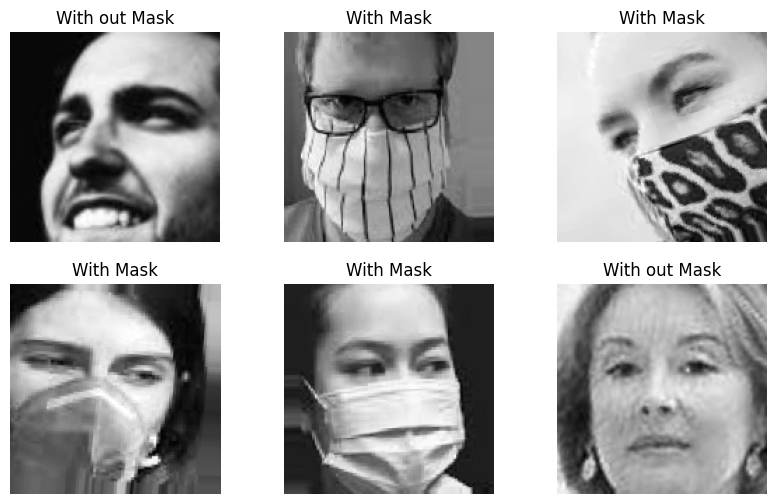

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(10,6))

for row in range(2):
    for col in range(3):
        image_index = row*100 + col

        ax[row, col].axis("off")
        ax[row,col].imshow(data[image_index][0], cmap = "gray")

        if data[image_index][1] == 0:
            ax[row, col].set_title("With out Mask")
        else:
            ax[row, col].set_title("With Mask")

In [20]:
data[0]

array([array([[12, 12, 12, ..., 15, 15, 16],
              [12, 12, 12, ..., 20, 19, 18],
              [12, 12, 12, ..., 27, 24, 22],
              ...,
              [13, 13, 13, ..., 24, 25, 26],
              [13, 13, 13, ..., 24, 25, 25],
              [13, 13, 13, ..., 25, 24, 24]], dtype=uint8), 0],
      dtype=object)

In [21]:
x = []
y = []

for image in data:
    x.append(image[0])
    y.append(image[1])

x = np.array(x)
y = np.array(y)

In [22]:
trdt, tedt, trlb,telb = train_test_split(x, y, test_size=0.2, random_state =13)

In [23]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(5,5), strides=(1,1), padding="same", activation = "relu",
                  input_shape=(150,150,1)),
    layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    layers.Conv2D(64, (2,2), activation="relu", padding= "same"),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation="relu"),
    layers.Dense(1, activation = "sigmoid")

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 37, 37, 64)        0         
                                                                 
 flatten (Flatten)           (None, 87616)             0

In [24]:
model.compile(optimizer= "adam",
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics=["accuracy"])

In [25]:
trdt = trdt.reshape(len(trdt), trdt.shape[1], trdt.shape[2], 1)
tedt = tedt.reshape(len(tedt), tedt.shape[1], tedt.shape[2], 1)

hist = model.fit(trdt, trlb, epochs=5, batch_size = 32)

Epoch 1/5
250/250 [==============================] - 25s 48ms/step - loss: 64.1434 - accuracy: 0.8771
Epoch 2/5
250/250 [==============================] - 12s 47ms/step - loss: 0.0802 - accuracy: 0.9732
Epoch 3/5
250/250 [==============================] - 12s 47ms/step - loss: 0.0507 - accuracy: 0.9814
Epoch 4/5
250/250 [==============================] - 12s 46ms/step - loss: 0.0679 - accuracy: 0.9772
Epoch 5/5
250/250 [==============================] - 12s 47ms/step - loss: 0.0386 - accuracy: 0.9852


In [26]:
model.evaluate(tedt, telb)

63/63 [==============================] - 2s 15ms/step - loss: 0.0898 - accuracy: 0.9735


[0.08978540450334549, 0.9735000133514404]

In [29]:
prediction = (model.predict(tedt) > 0.5).astype("int32")

print(classification_report(telb, prediction))
print(confusion_matrix(telb, prediction))

63/63 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       971
           1       0.97      0.98      0.97      1029

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000

[[ 937   34]
 [  19 1010]]


In [30]:
wrong_result = []

for n in range(0, len(telb)):
    if prediction[n] != telb[n]:
        wrong_result.append(n)


len(wrong_result)

53

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


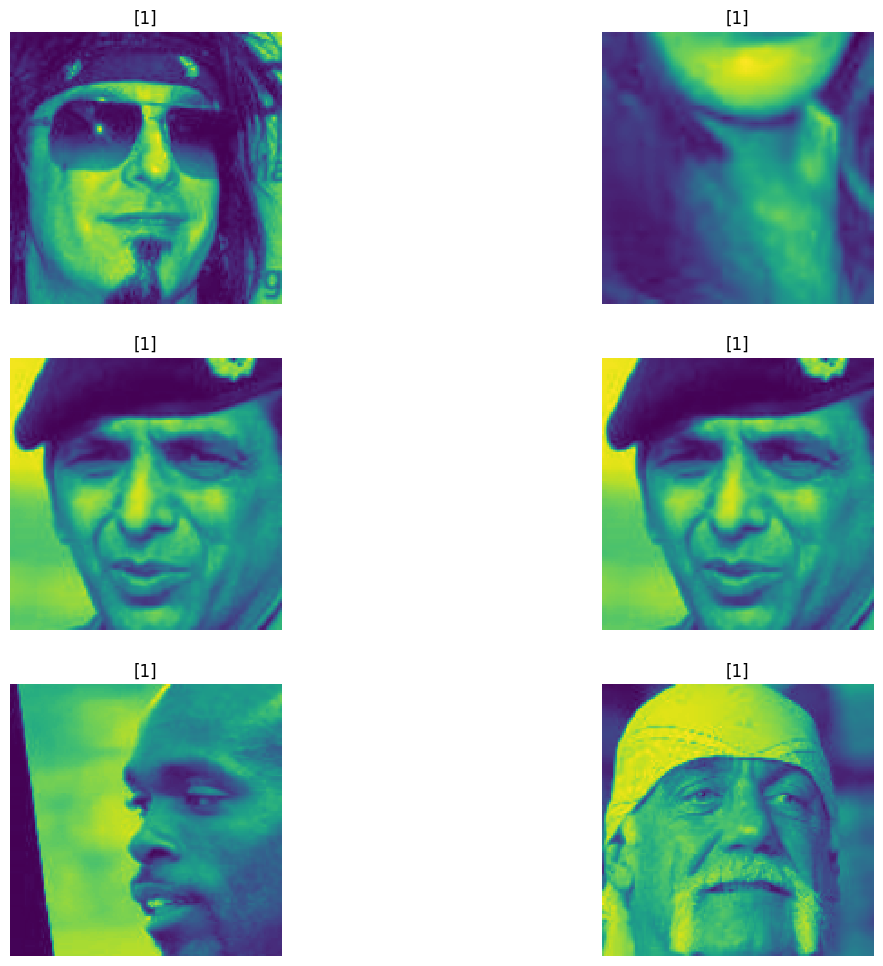

In [31]:
import random

samples = random.choices(population = wrong_result, k=6)

plt.figure(figsize=(14,12))

for idx, n in enumerate(samples):
    plt.subplot(3, 2, idx+1)
    plt.imshow(tedt[n].reshape(150,150), interpolation = 'nearest')
    plt.title(prediction[n])
    plt.axis("off")

plt.show()